Dataset loaded successfully.
Cleaning dataset...
Dataset cleaned.
Preprocessing dataset...
Dataset preprocessed.
Generating visualizations...


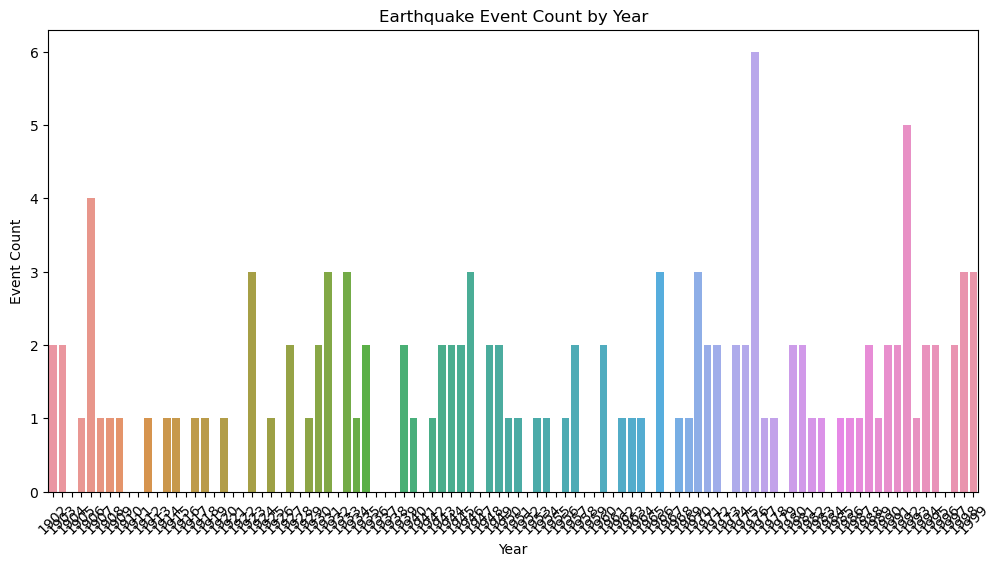

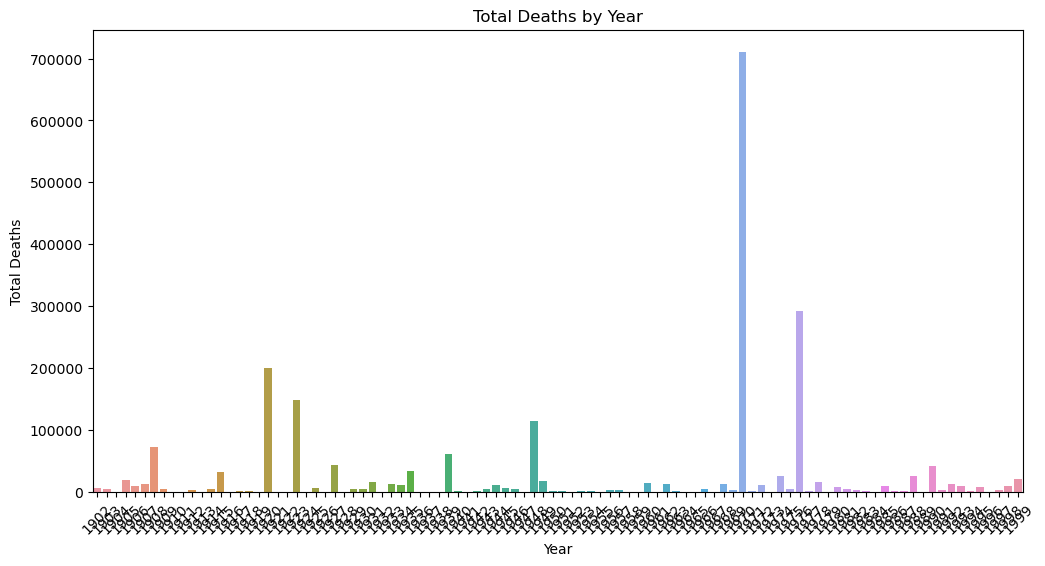

Performing clustering...


C:\Users\jenit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jenit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clustering completed.
            richter   deaths  event_count  cluster
date                                              
1902-12-31    6.950   6700.0            2        0
1903-12-31    6.400   4500.0            2        0
1905-12-31    7.500  19000.0            1        0
1906-12-31    7.975   9132.0            4        0
1907-12-31    8.100  12000.0            1        0
Clustered dataset saved to 'clustered_earthquake_data.csv'.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from datetime import datetime

# Function to load dataset
def load_dataset(file_path):
    """
    Load a time series disaster dataset.

    Args:
        file_path (str): Path to the dataset file.

    Returns:
        DataFrame: Loaded dataset.
    """
    try:
        data = pd.read_csv(file_path)
        print("Dataset loaded successfully.")
        return data
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# Function to clean dataset
def clean_dataset(data):
    """
    Clean the disaster dataset by handling missing values and duplicates.

    Args:
        data (DataFrame): Input dataset.

    Returns:
        DataFrame: Cleaned dataset.
    """
    print("Cleaning dataset...")

    # Combine 'year', 'month', and 'day' into a single 'date' column
    data['month'] = data['month'].apply(lambda x: datetime.strptime(x, '%B').month if isinstance(x, str) else x)
    data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
    data.drop(columns=['year', 'month', 'day'], inplace=True)

    # Handle missing values
    data['area'].fillna('Unknown', inplace=True)
    data['region'].fillna('Unknown', inplace=True)
    data['deaths'].fillna(data['deaths'].median(), inplace=True)

    # Remove duplicates
    data = data.drop_duplicates()

    # Sort by date
    data.sort_values(by='date', inplace=True)

    print("Dataset cleaned.")
    return data

# Function to preprocess time series data
def preprocess_timeseries(data):
    """
    Preprocess the disaster dataset by resampling and feature extraction.

    Args:
        data (DataFrame): Input dataset.

    Returns:
        DataFrame: Preprocessed dataset.
    """
    print("Preprocessing dataset...")

    # Resample to yearly data
    data_resampled = data.set_index('date').resample('Y').agg({
        'richter': 'mean',      # Average magnitude per year
        'deaths': 'sum',        # Total deaths per year
        'area': 'count',        # Count of events per year (proxy for frequency)
    }).rename(columns={'area': 'event_count'})

    # Add year as a separate column
    data_resampled['year'] = data_resampled.index.year

    print("Dataset preprocessed.")
    return data_resampled

# Function to visualize data
def visualize_data(data):
    """
    Generate bar charts and visualizations.

    Args:
        data (DataFrame): Preprocessed dataset.
    """
    print("Generating visualizations...")

    # Bar chart for event count by year
    plt.figure(figsize=(12, 6))
    sns.barplot(x='year', y='event_count', data=data.reset_index())
    plt.title('Earthquake Event Count by Year')
    plt.xlabel('Year')
    plt.ylabel('Event Count')
    plt.xticks(rotation=45)
    plt.show()

    # Bar chart for deaths by year
    plt.figure(figsize=(12, 6))
    sns.barplot(x='year', y='deaths', data=data.reset_index())
    plt.title('Total Deaths by Year')
    plt.xlabel('Year')
    plt.ylabel('Total Deaths')
    plt.xticks(rotation=45)
    plt.show()

# Function to perform clustering
def perform_clustering(data):
    """
    Perform KMeans clustering on the dataset.

    Args:
        data (DataFrame): Preprocessed dataset.

    Returns:
        DataFrame: Dataset with cluster labels.
    """
    print("Performing clustering...")

    # Selecting features for clustering
    clustering_data = data[['richter', 'deaths', 'event_count']].dropna()

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clustering_data['cluster'] = kmeans.fit_predict(clustering_data)

    print("Clustering completed.")
    return clustering_data

# Main execution block
if __name__ == "__main__":
    # Replace 'disaster_dataset.csv' with your file path
    file_path = 'earthquakes.csv'

    # Step 1: Load the dataset
    dataset = load_dataset(file_path)

    if dataset is not None:
        # Step 2: Clean the dataset
        cleaned_data = clean_dataset(dataset)

        # Step 3: Preprocess the dataset
        preprocessed_data = preprocess_timeseries(cleaned_data)

        # Step 4: Visualize the dataset
        visualize_data(preprocessed_data)

        # Step 5: Perform clustering
        clustered_data = perform_clustering(preprocessed_data)
        print(clustered_data.head())

        # Save the clustered dataset
        clustered_data.to_csv('clustered_earthquake_data.csv')
        print("Clustered dataset saved to 'clustered_earthquake_data.csv'.")
